In [1]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

from BinSpectra import random_noise_dataset
from BinSpectra import lowres_dataset
import warnings
from cycler import cycler
import random

PATH = '../Data/DataProducts/'

In [4]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)

def replace_flux_with_noise(phase):
    datain = loaddata(phase)
    dataset_randn = random_noise_dataset(datain)
    return dataset_randn

def plot_spectra(phase):
    PATH_save = '../Plots/'
    dataset = replace_flux_with_noise(phase)
    dataset_key_list = list(dataset.keys())
    plot_dataset, axs = plt.subplots(len(dataset), figsize=(16,200), gridspec_kw={'hspace':.5})
    number_of_colors = len(dataset)
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for k in range(number_of_colors)]
    i = 0
    #axs.set_prop_cycle(cycler('color', colors))
    for sne in dataset_key_list:
        wvl = dataset[sne].wavelengths
        flux = dataset[sne].data
        axs[i].plot(wvl, flux, color = colors[i], linewidth=1.5, label = "%s"%sne)
        axs[i].set_xlabel('Wavelength', fontsize=18)
        axs[i].set_ylabel('Flux', fontsize=18)
        axs[i].tick_params(axis='both', which='major', labelsize=18)
        axs[i].legend(loc="upper right", fontsize = '12')
        i = i + 1
        plot_dataset.savefig(PATH_save + 'dataset_spectra_plot_%d.png'%phase, bbox_inches='tight')
        plt.close()
    return plot_dataset


def plot_spectra_res(phase):
    PATH_save = '../Plots/'
    m = 0
    k = 0.0027069686088658784
    while k <= 0.11098571296350102:
        dataset = replace_flux_with_noise(phase)
        dataset_lowres = lowres_dataset(dataset, k)
        dataset_key_list = list(dataset_lowres.keys())
        plot_dataset, axs = plt.subplots(len(dataset_lowres), figsize=(16,200), gridspec_kw={'hspace':.5})
        number_of_colors = len(dataset)
        colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for h in range(number_of_colors)]
        i = 0
        #axs.set_prop_cycle(cycler('color', colors))
        for sne in dataset_key_list:
            wvl = dataset_lowres[sne].wavelengths
            flux = dataset_lowres[sne].data
            axs[i].plot(wvl, flux, color = colors[i], linewidth=1.5, label = "%s"%sne)
            axs[i].set_xlabel('Wavelength', fontsize=18)
            axs[i].set_ylabel('Flux', fontsize=18)
            axs[i].tick_params(axis='both', which='major', labelsize=18)
            axs[i].legend(loc="upper right", fontsize = '12')
            i = i + 1
        k = k + 0.010827874435463514
        m = m + 1
        plot_dataset.savefig(PATH_save + 'spectra_plot_ph%d_%d.png'%(phase, m), bbox_inches='tight')
        plt.close()
    return plot_dataset

In [ ]:
plot_spectra(10)

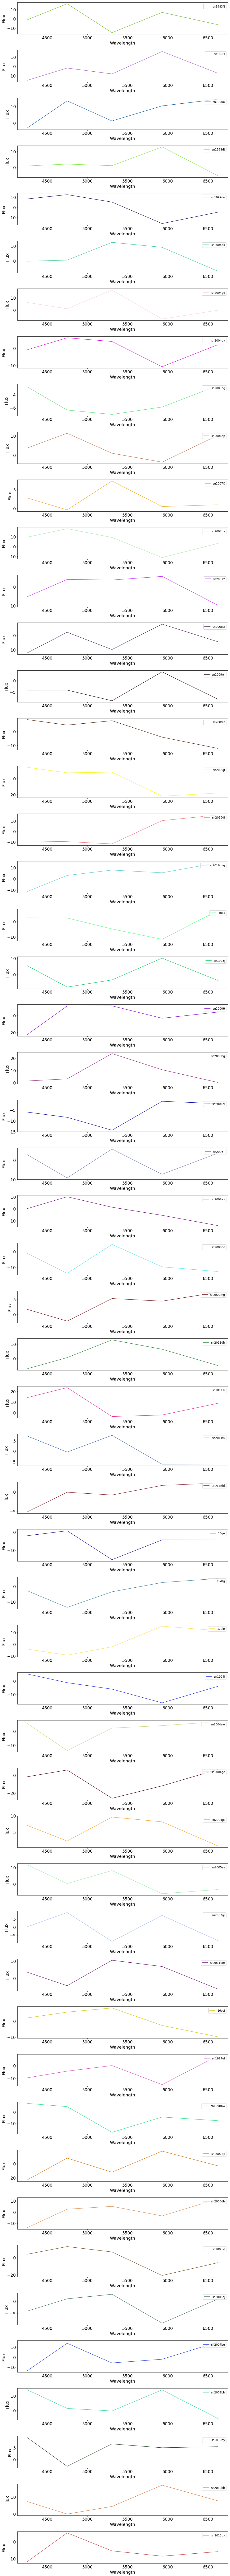

In [3]:
plot_spectra_res(15)